<a href="https://colab.research.google.com/github/neuralabc/PythonTools4Neuroimaging/blob/main/PSYC458_02_Python_for_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
There are a whole host of specialized packages for working with MRI data in python, but the power of learning what _data_ is and how to work with it is that you can then understand __how__ data processing is taking place. Most of this code is open-source, which means that you can track the function all the way back to the base code that was used to implement it. We should not expect to have to do that in most cases, but having it as a possibility empowers you to undestand what the code is doing, learn from others' code, and even just copy the code to use in another function that you are developing (with attribution, of course!)

## Basic I/O for imaging formats (2 primary options)
- `nibabel`: https://nipy.org/nibabel/
  - loads/saves most types of neuroimaging data, including those that we will focus on in this course
    - 3D and 4D nifti files, with the extension .nii or .nii.gz
  - includes convenience functions for dealing with common issues
- `simpleitk`: https://simpleitk.org/
  - loads/saves most types of image data, including neuroimaging data
  - includes access to a huge toolkit of processing routines that are outside of the realm of I/O

We will use the nibabel package for this course due to its relative simplicity of use. It is not necessarily the best package for more complex functions, but it does its primary job of getting access to neuroimaging data very well.

## Essential contents of a nueromaging data file (abridged version!)
  - `data`: this is your data, i.e., numbers that have a specific type {float, int}
    - in nibabel, we load all data as float initially (we can convert it if we need to later by calling `.astype(new_type)` as necessary because the data is stored as an `numpy` ndarray (and `.astype()` is a function for ndarrays)
      - e.g., converting `m` matrix of type `float` to a boolean representation: `m=m.astype(bool)` 
  - `affine` transform: this is a 4x4 matrix that defines the transformation between voxel space and millimeter coordinate space in the real world
    - required for registration, and an output of registration
      - this is the tranformation matrix
    - required to display your data in the correct space relative to other data
    - crucial to consider the space of the data in __all types of analyses__
  - `header` information: extra information about the acquisition of the data that is useful for formatting it
    - most image viewers require valid `header` data to display the image
    - technically, this also contains the `affine` matrix

### Nibabel data access
#### Loading data with nibabel
Now lets see what we can do to load some image data. Lets say we have a file called _my_data.nii.gz_ in our current directory. In this course, we will use .nii.gz files for 3D and 4D image types.
  - `import nibabel as nb` #to import the package
  - `img = nb.load('my_data.nii.gz')` #to create an image object, `img` that contains the .nii.gz file 
  - `data = img.get_fdata()` #gives us a view of the data stored in the `img` object
    - ** this __does not__ copy the data from the image object, so changing any numbers in `data` will also change them within the `img` object!
    - to explicitly copy the data, use `.copy`: `data = img.get_fdata().copy()`
      - now changing values within `data` has no impact on `img`
    - you can also cast this data to a different type, for example: `data = img.get_fdata().copy().astype(int)`
      - ** careful, converting from one type to another can lose information
        - e.g., float -> int: 0.001 -> 0
        - try it: `np.array([0.001]).astype(int)`
  - now you can process your data however you like!
    - add a value to each element/voxel in the image: `data = data + 200`

#### Saving data with nibabel
When you are done, you will need to save your modified data, nibabel makes that easy but first you need to combine the data with an `affine` and `header` to have it in the standardized format (.nii.gz). This is done by explicitly creating an image object of type nifty and then saving it to disk.
  - `img_out = nb.Nifti1Image(data,affine=img.affine,header=img.header)` #create the image for output of type Nifti1Image (this is the most compatible standard) by setting the `data`, `affine`, and `header` information)
    - note that here we use the affine and header information from the input image. This is because it is more difficult to create these yourself and in most cases there is no need. In our usage, we should always be able to use the `affine` and `header` information from an originally loaded image
      - ** when you want to output data of a different type than the data that was loaded, you will need to change and update the header
      - the affine will only change if you were to change the registration of the image
  - `img_out.to_filename("my_output_data.nii.gz")` #save that data to a filename of your choosing!

In [1]:
#some standard imports
import nibabel as nb
import numpy as np


# Adding packages that do not currently exist in google colab
  - we can add packages that don't exist within google colab
  - it will take a few seconds to download to the colab server and install, and you will need to do this every time you open a new session so it is a good idea to do all of them at once
  - use the `!pip install` syntax to do so, it will work for any pip-installable Python package (there are 1000s)
  - after installing, you can import the module as normal!
  - you don't need to do anything other than this

In [2]:
# we also need a package that is not installed in colab, so lets get that first
#https://nilearn.github.io/
!pip install nilearn #functional MRI processing and statistics, and machine learning for fMRI

# Fetch data from repositories to use as toy data
  - there are many freely available datasets (https://neurovault.org/ is the most used general storage location)
  - data is downloaded through specialized functions in many packages, including this example from nilearn (https://nilearn.github.io/stable/index.html)
  - we fetch the .nii.gz files and can then `.load` them with `nibabel` to access the image object for plotting etc


In [3]:
#now we can load plotting functions and datasets
from nilearn import plotting #https://nilearn.github.io/
from nilearn import datasets #this gives us some access to freely available "testing" data distributed by the community
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [4]:
#lets fetch some data to play with
motor_images = datasets.fetch_neurovault_motor_task()
print(motor_images.images[0]) #to see what the first dataset is called and where it is stored - this tells us that it is stored in this google colab instance, NOT in your drive directory
stat_img = motor_images.images[0]


/root/nilearn_data/neurovault/collection_658/image_10426.nii.gz


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



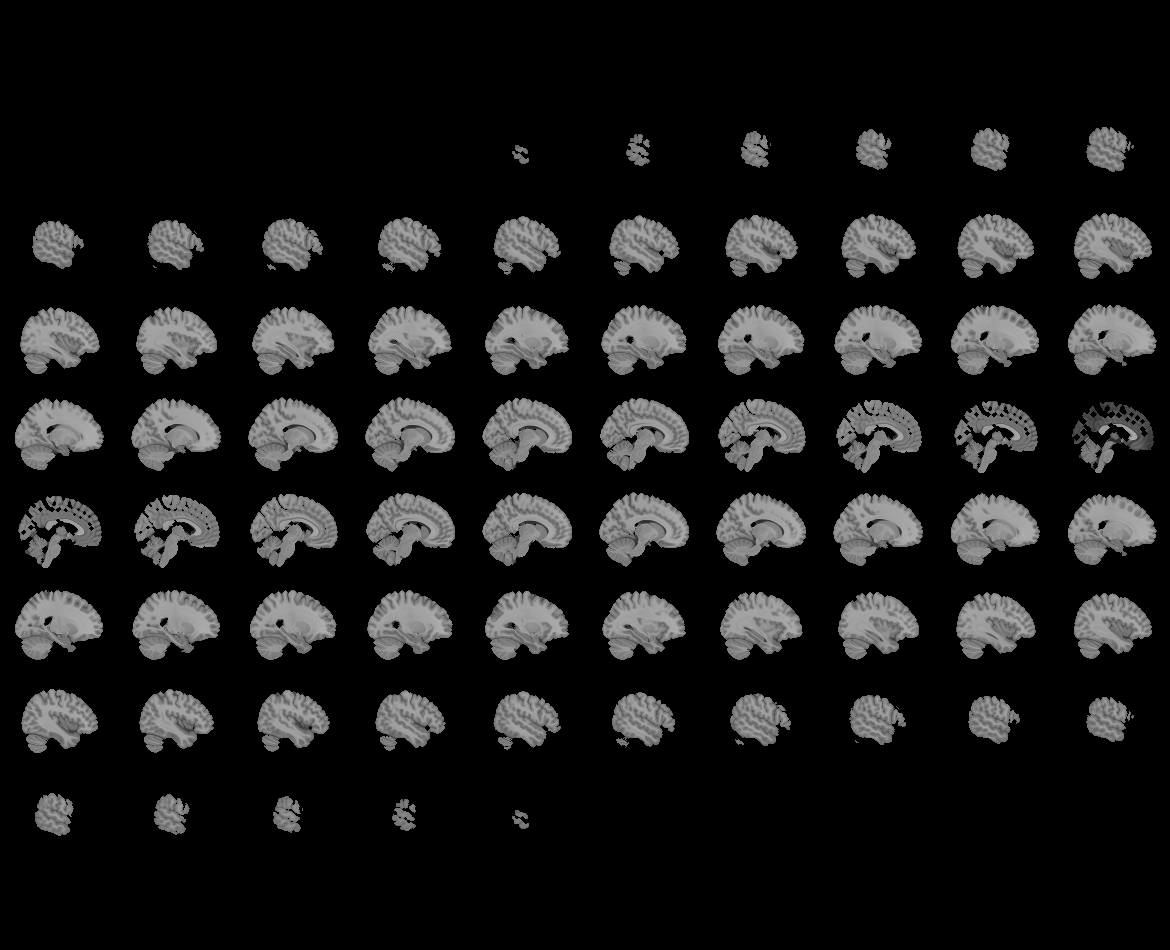
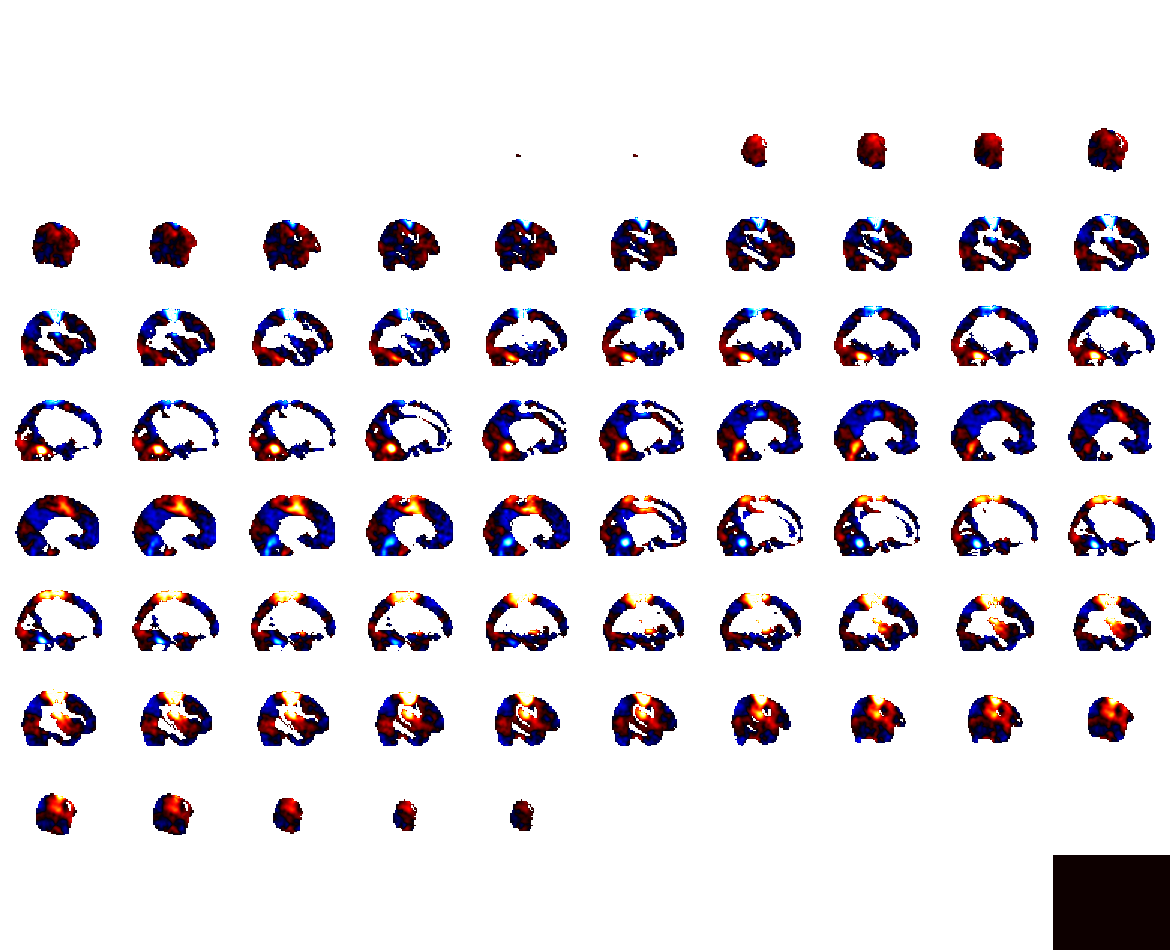

In [5]:
#interactive plotting, for fun (click around!)
plotting.view_img(stat_img) # puts the statistical image on top of a standard anatomical image (T1w). In the background this projects data into the correct space based on the affine matrix

# Working with the actual data that is stored within the image file
  - with `nibabel` it is simple to extract the data from the image
    - this data is returned in an array (3d or 4d, usually) and indexed by using _voxel coordinates_. Remember our data is represented within voxels that are mapped to the real world _mm coordinates/world coordinates_ via the affine transform 

## 3D data

In [6]:
#lets learn about the data inside this image object
img = nb.load(stat_img)
data = img.get_fdata()
print(type(data)) #type of the data container, should be ndarray
print(type(np.ravel(data)[0])) #type of the first element, should be float! (ravel transforms the data from 3D->1D)
print(data.ndim)
print(data.shape) #what shape does this ndarry have? (i.e., what are the sizes of the dimensions of the array?)
print(data.max())
print(data.min())

<class 'numpy.ndarray'>
<class 'numpy.float64'>
3
(53, 63, 46)
7.94134521484375
-7.941444396972656


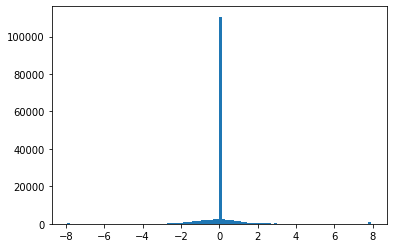

In [7]:
#lets explore some more, with a histogram over all the data
# again, use ravel to go from 3D -> 1D (flatten the array)
data_vec = data.ravel()
hh = plt.hist(data_vec,bins=100) #that is not too informative, there is a HUGE peak at 0!

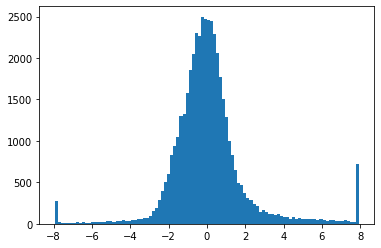

In [8]:
#so lets get rid of values that are zero, since they correspond to the background of the image (i.e., we make the assumption that all voxels filled with 0s are not interesting data)
data_nozeros_vec = data_vec[data_vec!=0]
hh = plt.hist(data_nozeros_vec,bins=100) #much better. now the bin at 0 represents statistical values close to 0. 
# This is a simplification, it would be MUCH better to use a mask to identify the regions we are interested in so that any 0s that are real data are included


In [9]:
#manipulate the data
#first create a nonzero mask in 3D
mask = data!=0
data[mask] = data[mask] * 2 #multiply all the data that is nonzero by 2
out_img = nb.Nifti1Image(data,img.affine,img.header) #create the image object


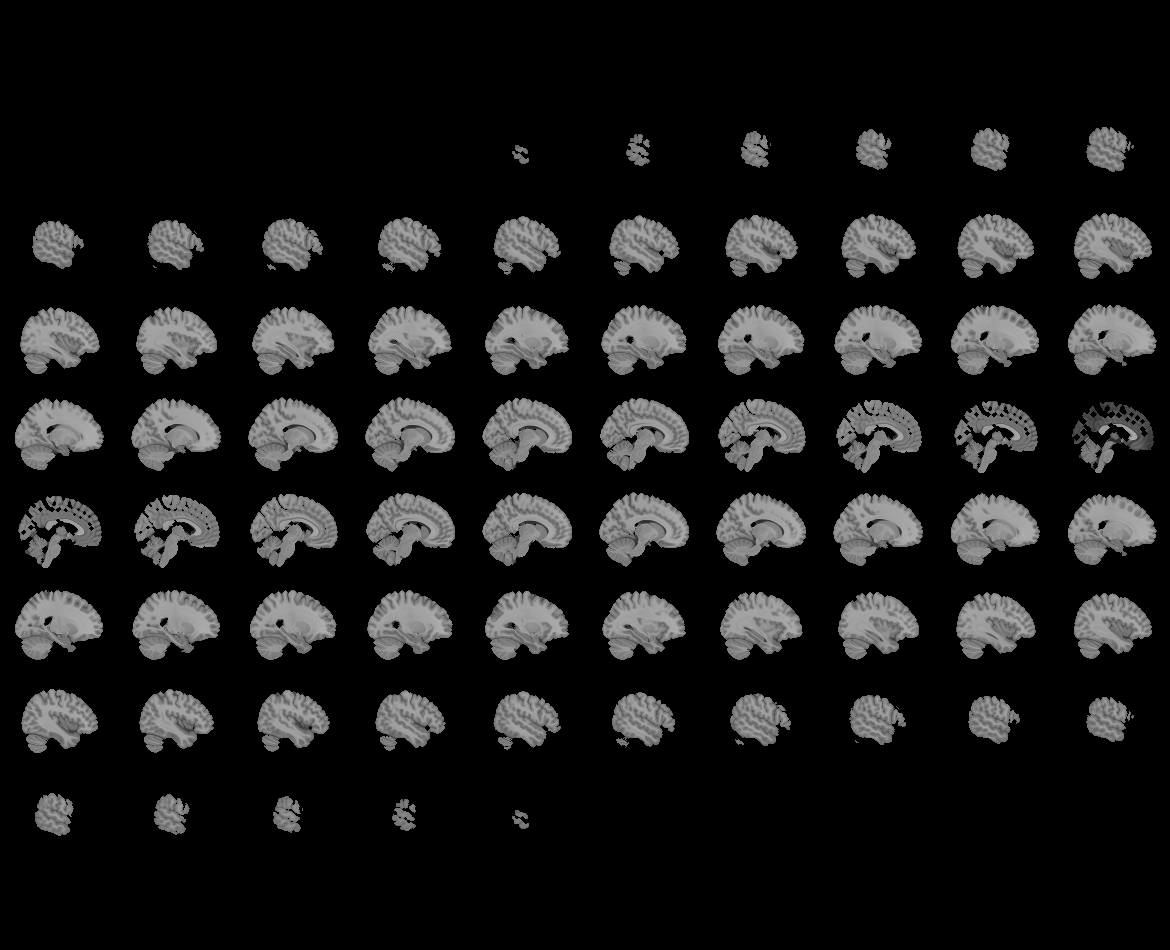
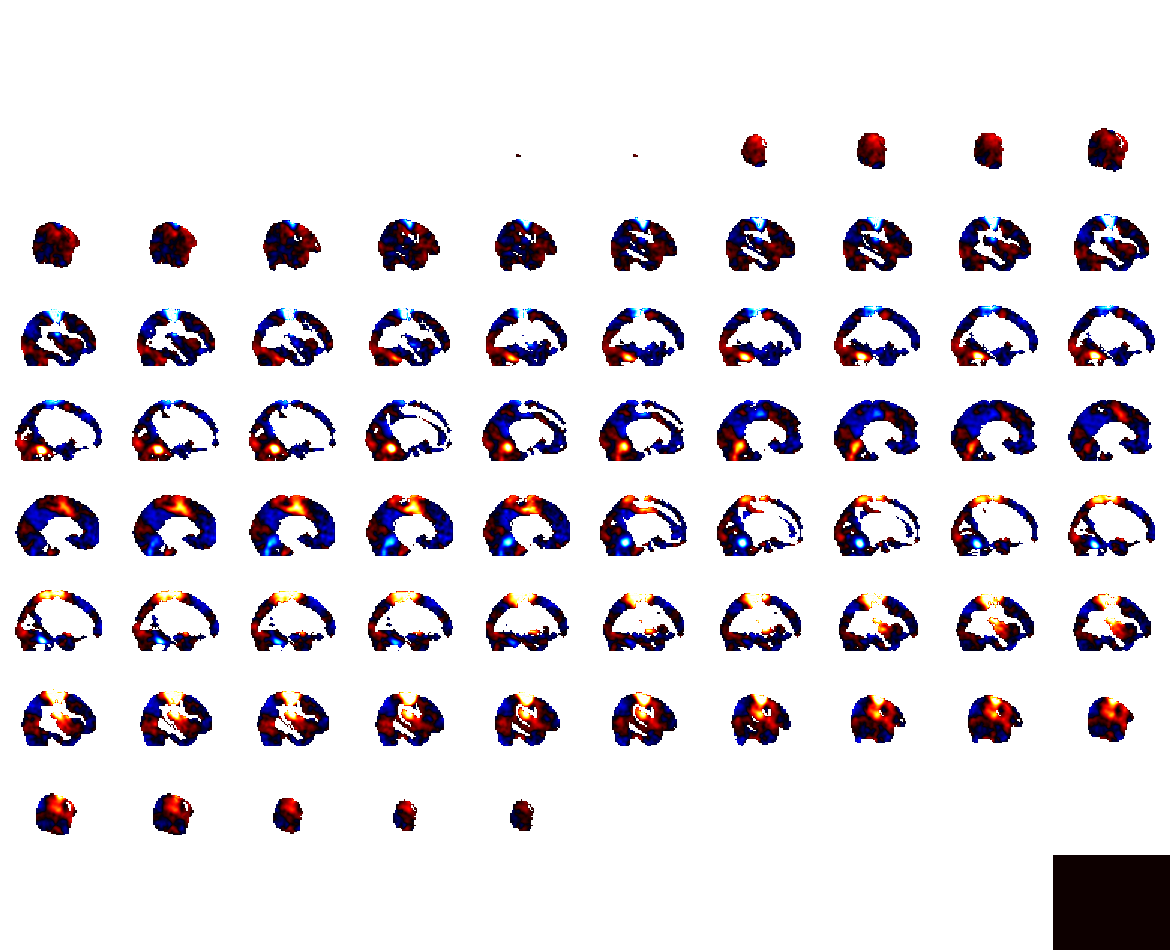

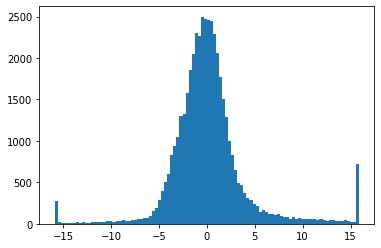

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure()
hh = plt.hist(data[mask],bins=100) #plot the histogram to confirm
plt.figure()
plotting.view_img(out_img) #now plot our modified data! - same colors but the scale bar has changed to reflect the doubling of values


## 4D data
- we will extract it from a different dataset than the one we used before
- this will take a few seconds to download
- we will need to determine where the data is stored to be able to access it, conveniently the function gives us the full path and filename to the image files
  - you will note that there are other types of data here as well, since this is _real_ data from a _real_ study that was conducted
1. Download the dataset
2. Determine where it is stored
  - this location is **not** permanent, it exists only within the current google colab instance
3. Load the image, get access to the data (i.e., the array of values)
  - we also load a `.tsv` tab-seperated values file that contains the experimental paradigm for the data in question
4. Plot a simple 2D slice of the data
  - we could also convert to a volume and plot a single volume
  - but we do not have a viewer for the 4D data directly :(
5. Plot a single voxel's data across volumes

In [11]:
dataset = datasets.fetch_language_localizer_demo_dataset()

In [12]:
dataset

('/root/nilearn_data/fMRI-language-localizer-demo-dataset',
 ['/root/nilearn_data/fMRI-language-localizer-demo-dataset/.bidsignore',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/CHANGES',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/README',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/access_data.py',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/dataset_description.json',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/dataset_description.json',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-confounds_regressors.tsv',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.json',
  '/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.nii.gz',
  '/root/nilearn_data/fMRI-language-localizer-d

In [13]:
!cat /root/nilearn_data/fMRI-language-localizer-demo-dataset/README

Langloc10 dataset

Time-stamp: <2019-08-28 17:56:00 christophe@pallier.org>

Ten french subjects were scanned with fMRI (3T Siemens Timtrio at Neurospin) during a "language localizer" where they (covertly) read meaningful sentences (trial_type='language') or strings of consonants (trial_type='string'), presented one word at a time at the center of the screen (rapid serial visual presentation).

The functional images files (in derivatives/) have been preprocessed (spatially realigned and normalized into the MNI space). Initially acquired with a voxel size of 1.5x1.5x1.5mm, they have been resampled to 4.5x4.5x4.5mm to save disk space.

This dataset is distributed under a Open Data Commons Attribution-Sharealike license (see https://www.opendatacommons.org/norms/odc-by-sa/). It is used for demos by [nistats](http://nistats.github.io)



In [14]:
#point to the functional data, based on the directories that were indicated above
func = '/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.nii.gz'
task = '/root/nilearn_data/fMRI-language-localizer-demo-dataset/sub-01/func/sub-01_task-languagelocalizer_events.tsv'
print(func)


/root/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.nii.gz


In [15]:
# first look at pandas - use it to read a tab-delimited file (spreadsheet style file, similar to csv)
import pandas as pd
task_df = pd.read_csv(task,delimiter='\t')
print(task_df)

      onset  duration trial_type
0     3.516     6.806   language
1    17.707     7.004     string
2    32.011     6.805   language
3    46.306     7.206     string
4    60.604     6.804   language
5    74.908     6.804     string
6    89.208     6.808   language
7   103.508     6.806     string
8   117.804     6.806   language
9   132.108     6.809     string
10  146.407     6.805   language
11  160.702     6.807     string
12  175.007     6.804   language
13  189.304     6.805     string
14  203.608     6.802   language
15  217.910     6.806     string
16  232.206     6.809   language
17  246.504     6.802     string
18  260.807     6.800   language
19  275.109     6.806     string
20  289.406     6.806   language
21  303.703     6.803     string
22  318.007     6.807   language
23  332.305     6.810     string


In [16]:
#load func image and get access to the data array
f_img = nb.load(func) #need [0] in this case because a list was returned - so we take the 0th element
func_data = f_img.get_fdata()
print(func_data.shape)

(45, 53, 43, 229)


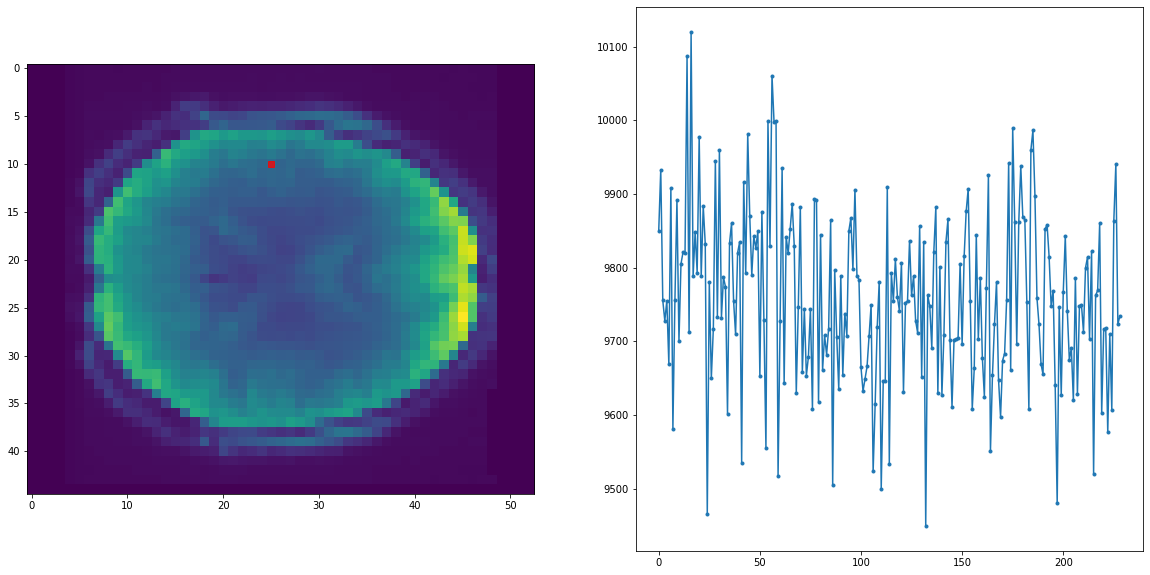

In [17]:
#see what this looks like, by plotting a 2D slice of the 4d data
vox_idx_x = 10
vox_idx_y = 25
vox_idx_z = 20
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(func_data[:,:,20,5])
plt.plot(vox_idx_y,vox_idx_x,'rs',alpha=0.75) #here we reversed x and y to plot the location of the point that we will sample the timeseries from because "x" on the plot is the "y" in the brain
# plt.figure() 
plt.subplot(1,2,2)
plt.plot(func_data[vox_idx_x,vox_idx_y,vox_idx_z,:],'.-') #plot the timeseries data

# Extras
## Looping
  - looping logic: run something a fixed number of times
  - looping implementation: `for` statement that loops over some variable with more than one element, ended by a `:`. Commands that are to be processed within the loop start directly below the line ending in `:` and are indented one level (with _tab_). Usually, you want to do something different on every iteration of the loop (e.g., print out a different word of a list) so you need to keep track of where you are in the loop and _index_ your position. For convenience, Python also includes an "enumerate" function that iterates over a list-like object and returns both the index and the value that it has. 
    - ```
    for idx in range(10):
        print(idx)
      ```
    - ```
    for idx,el in enumerate(['this','is','my','list']):
        print(idx)
        print(el)
      ```



In [18]:
for idx in range(10):
  print(idx)

0
1
2
3
4
5
6
7
8
9


In [19]:
for idx,el in enumerate(['this','is','my','list']):
  print(idx,end=" ") #we end the print function with a space rather than a carriage return so that the output of both is on the same line
  print(el)

0 this
1 is
2 my
3 list


## Looping over a 4D image
  - lets compute the mean and standard deviation across the entire image 
  - **NOTE:** this _includes_ all non-brain voxels too, so this is not something we would do for real data analyses!

(45, 53, 43, 229)


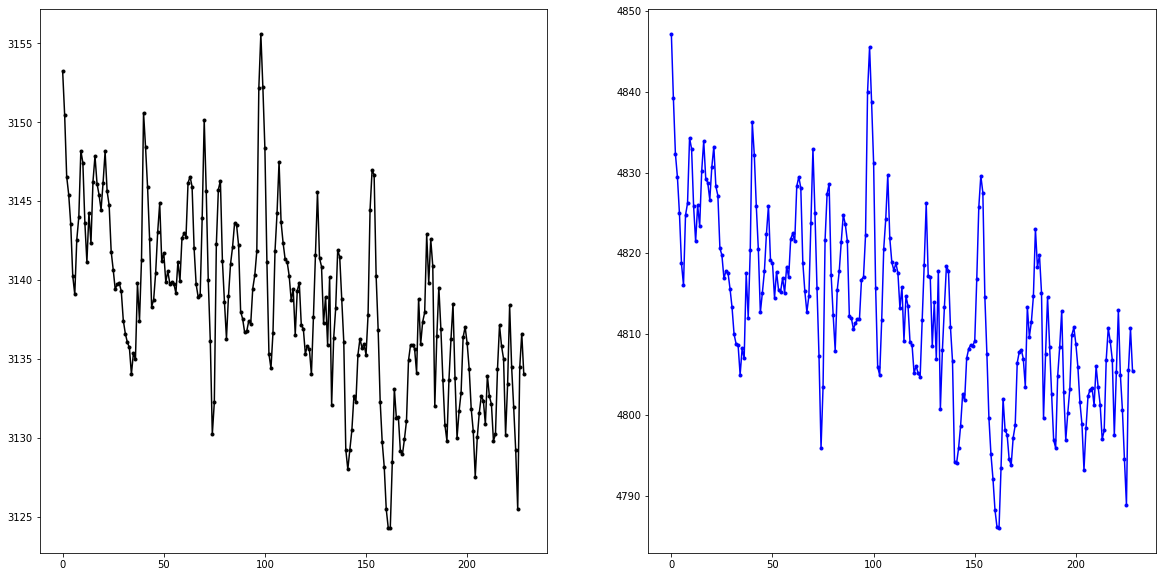

In [20]:
# using the same logic, we could iterate over every volume of the 4D image
print(func_data.shape)
num_vols = func_data.shape[-1] #reverse index, gives us the -1th element, which is the last one
#lets create variables to store some results
sd = np.zeros(num_vols) #we want a single sd values for each volume, so we need a vector of length num_vols 
mean = np.zeros(num_vols) # same thing here
for vol_idx in range(num_vols): #vol_idx will start at 0, and go to the total number of volumes (-1, since we start at 0)
  vol = func_data[:,:,:,vol_idx]
  #we use the same index to index our sd and mean vectors, since they also start at 0 and have the same number of elements
  sd[vol_idx] = np.std(vol)
  mean[vol_idx] = np.mean(vol)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(mean,'k.-') #in black
plt.subplot(1,2,2)
plt.plot(sd,'b.-') #in blue

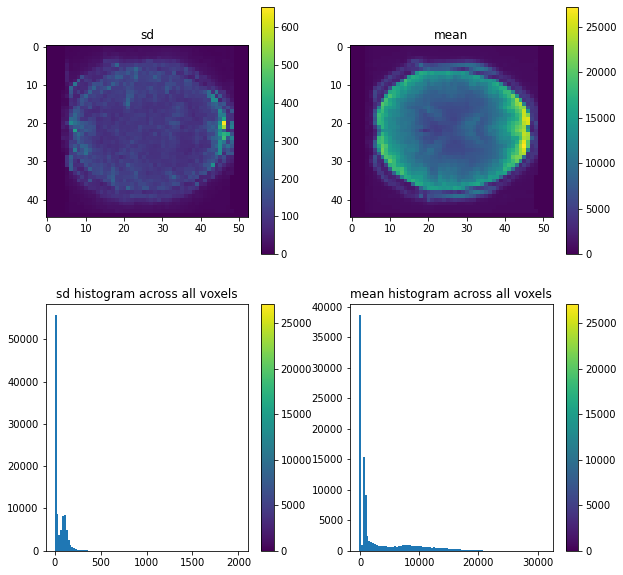

In [21]:
# that is great! but we want to look only in the grey matter voxels of the brain
# first, we take advantage of the knowledge that BOLD will have relatively large standard deviation and mean in grey matter
# 1. compute sd for each voxel across all volumes (this is NOT what we did last time, which was sd within volume for each volume)
# 2. visualize and inspect for values, determine cutoff to create a data mask
# 3. apply mask to data, then compute the mean and sd for the grey matter voxels only

# instead of looping, we take advantage of the numpy functions that will compute across dimensions
func_sd = np.std(func_data,axis=3)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(func_sd[...,20])
plt.title('sd')
plt.colorbar()

plt.subplot(2,2,2)
func_mean = np.mean(func_data,axis=3)
plt.imshow(func_mean[...,20])
plt.title('mean')
plt.colorbar()

plt.subplot(2,2,3)
hh = plt.hist(func_sd.ravel(),bins=100)
plt.title('sd histogram across all voxels')
plt.colorbar()

plt.subplot(2,2,4)
hh = plt.hist(func_mean.ravel(),bins=100)
plt.title('mean histogram across all voxels')
plt.colorbar()


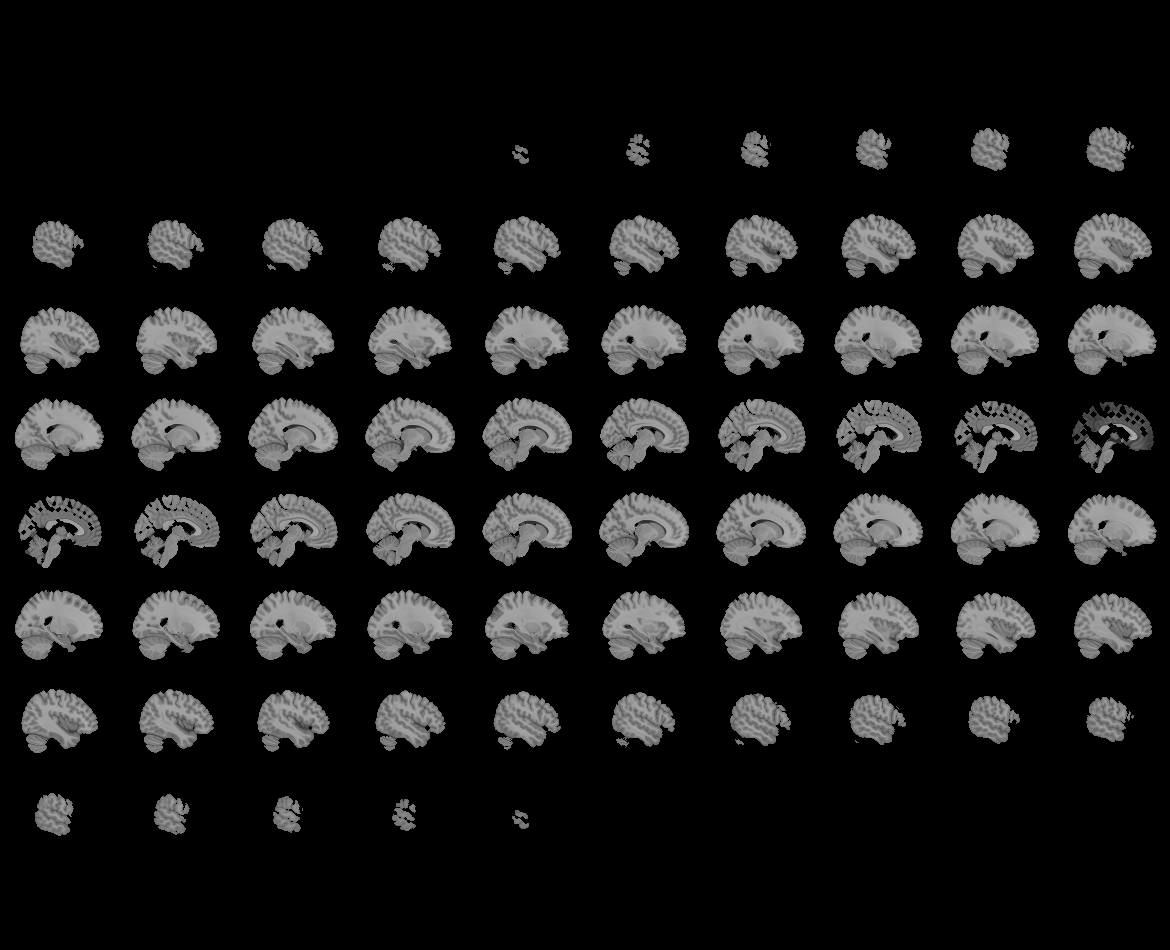
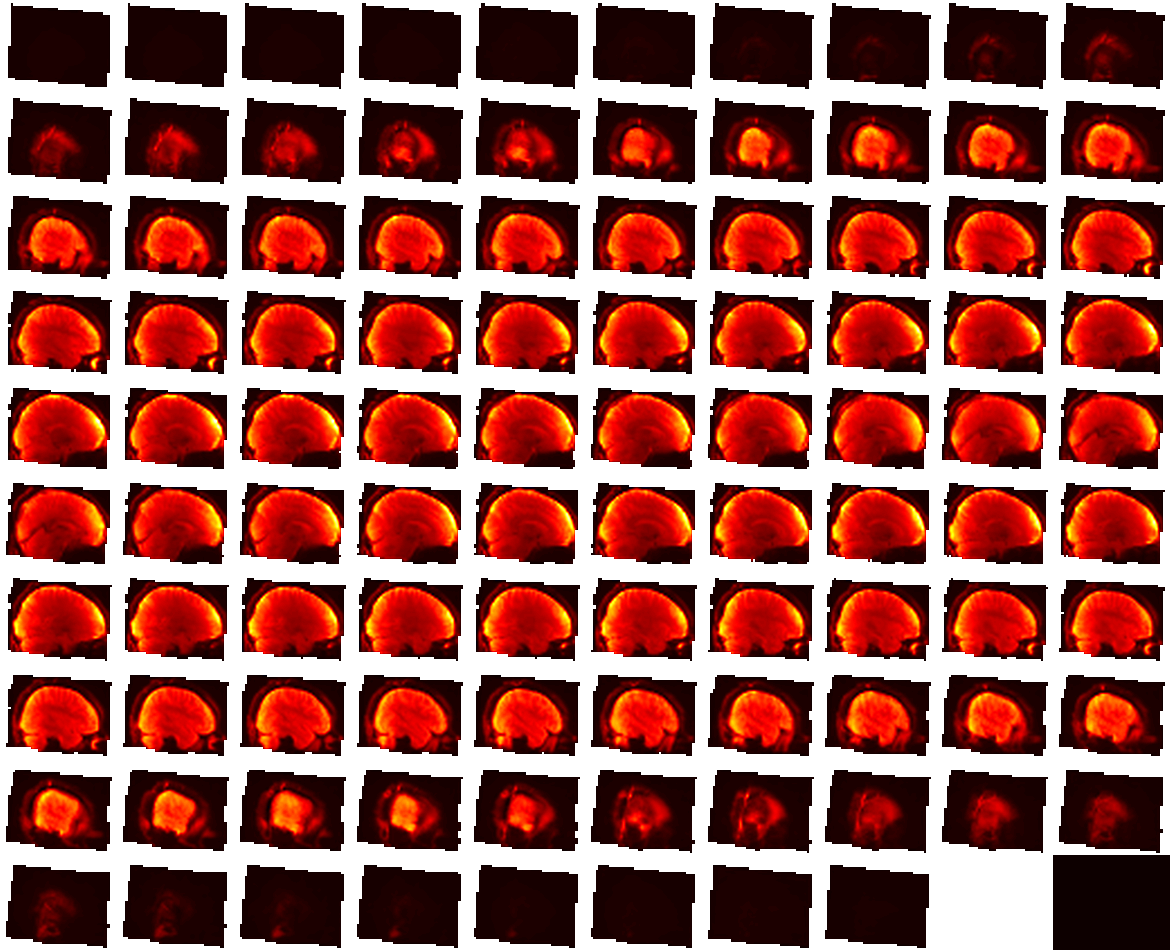

In [22]:
#in an interactive viewer
out_img = nb.Nifti1Image(func_mean,f_img.affine,f_img.header)
plotting.view_img(out_img,opacity=.5)


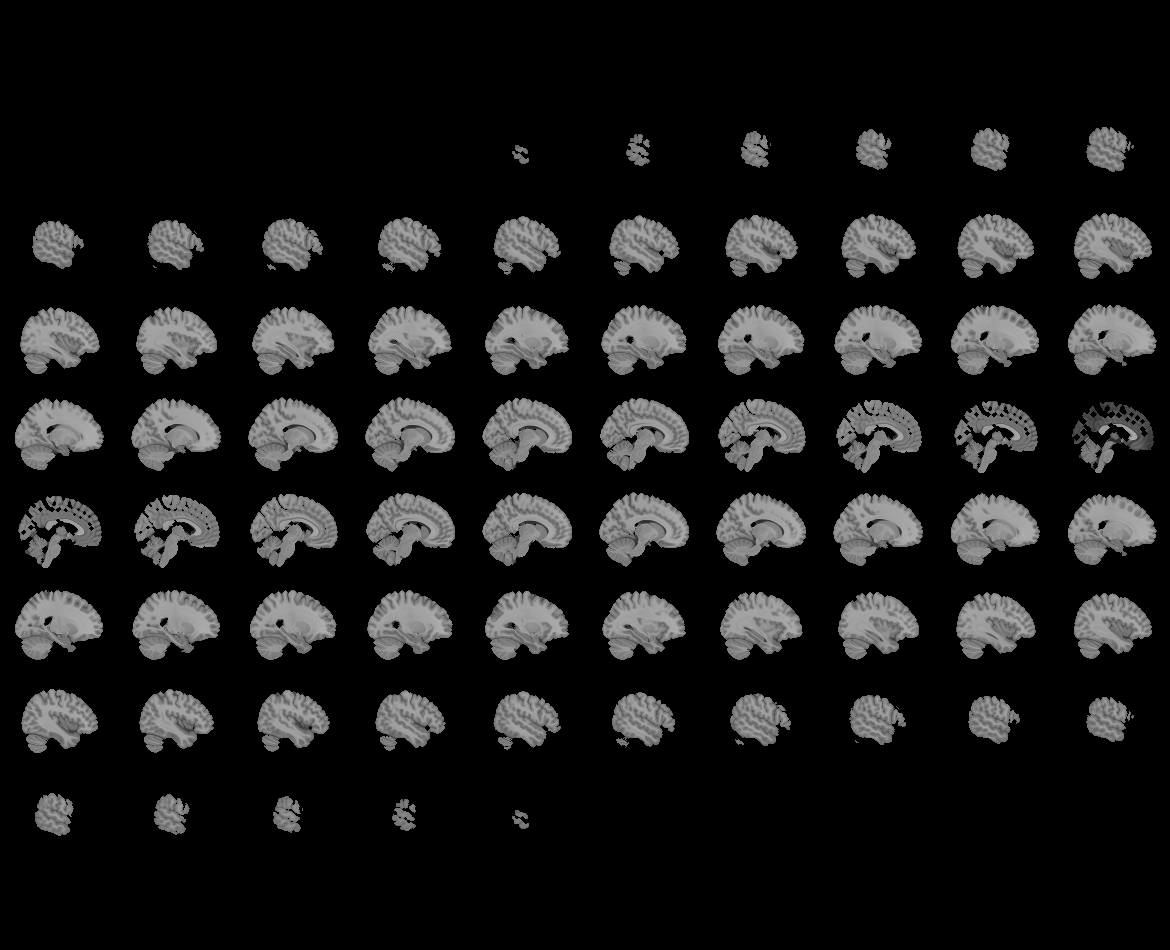
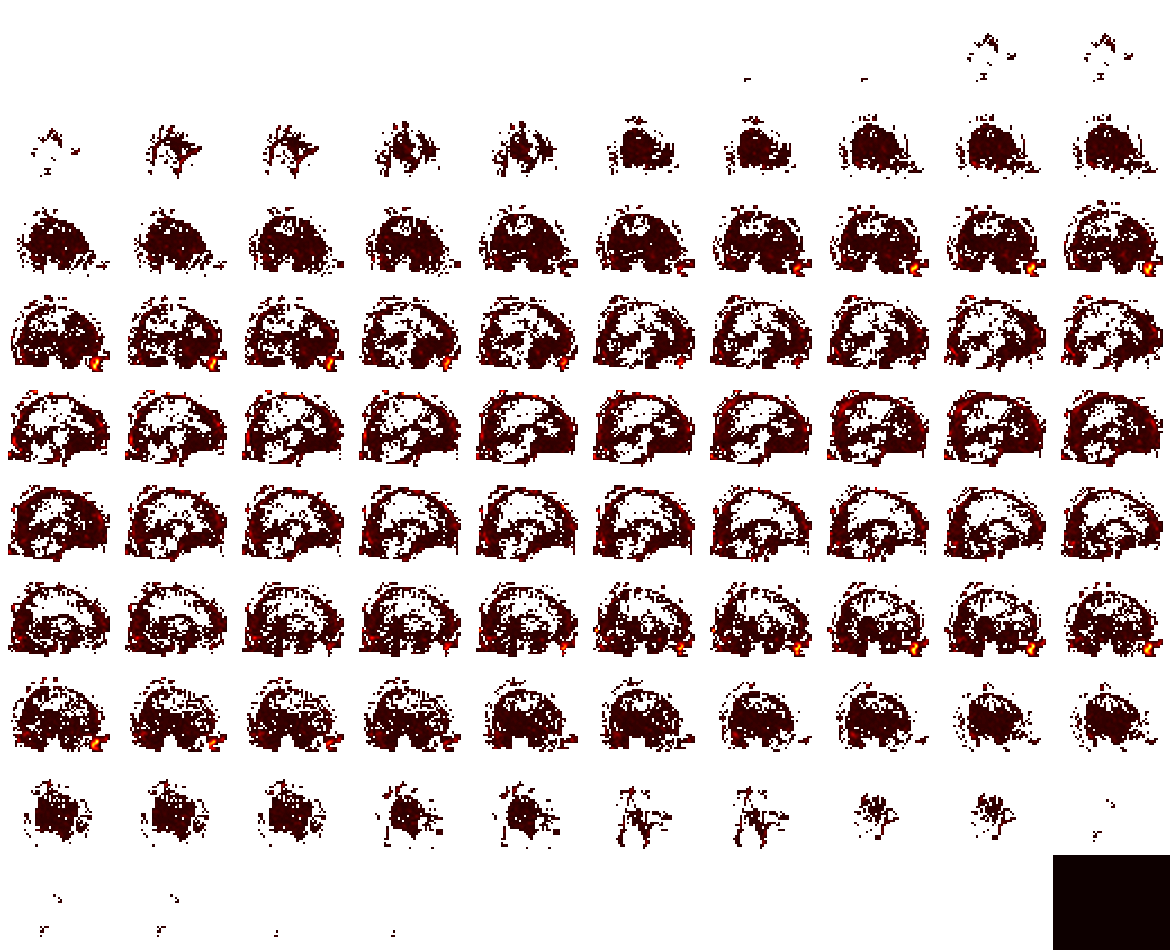

In [23]:
out_img = nb.Nifti1Image(func_sd,f_img.affine,f_img.header)
plotting.view_img(out_img,threshold=100,opacity=.5)

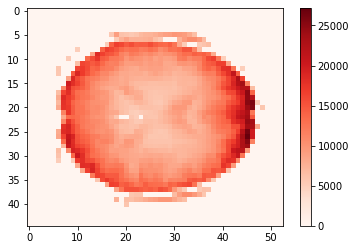

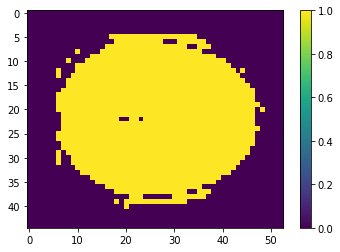

In [24]:
# based on those plots we can create a mean cut-off at around 5000 and see how this looks
_temp = func_mean.copy()
_temp[_temp<=5000] = 0 #set values to 0 that are less than or equal to 5000 so that we can see what this looks like
plt.imshow(_temp[...,20],cmap='Reds') #use a different colormap here so that we can see where 0 is easily (white in this case)
plt.colorbar()

# there are a lot of non-brain voxels included in this image, so it is not ideal... but lets use it for now

# create a 3d mask
brn_mask = func_mean>5000 #returns a boolean that is true everywhere that the condition is true
plt.figure()
plt.imshow(brn_mask[...,20])
plt.colorbar()

In [25]:
#now we need to extract data only from those voxels that are inside the mask (i.e., where the mask is True/=1)
# we take advantage of boolean indexing to do this: https://python-course.eu/numerical-programming/numpy-boolean-indexing.php
func_data_brain_2d = func_data[brn_mask,:] #extract from within the mask only, across all the volumes
# this results in a 2d array, not 4d like you might expect
#   - because boolean indexing returns a vector (1d array), and in this case we passed a 3D boolean mask to a 4D array, so we get back a vector for each instance of the 4th dimension (i.e., each volume)

print(func_data_brain_2d.shape) 
#0th dimension is "voxel" and 1st is "volume", we threw away the x,y,z positions of the voxels in the array
# that is ok, we don't need them here, plus we can always get them back if we know what mask was used to get the data

(25078, 229)


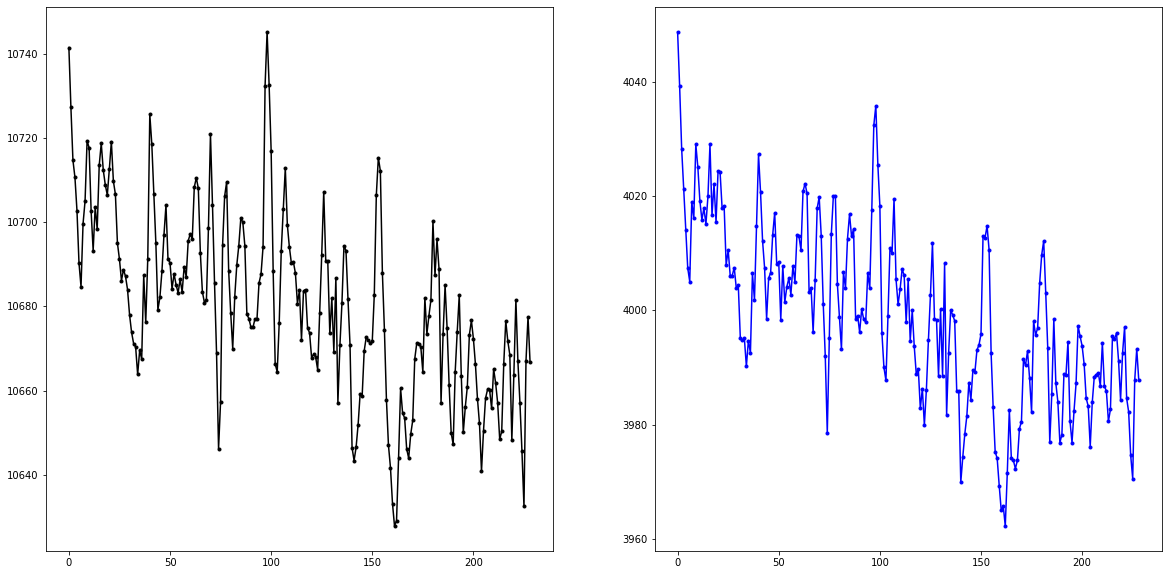

In [26]:
# now we can compute our mean and sd across volumes in our data that includes only brain voxels
mean_brain = np.mean(func_data_brain_2d,axis=0) #average across the 0th axis to get volume-wise mean
sd_brain = np.std(func_data_brain_2d,axis=0) 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(mean_brain,'k.-') #in black
plt.subplot(1,2,2)
plt.plot(sd_brain,'b.-') #in blue

In [27]:
print(sd_brain.shape)

(229,)


## Conditionals
- we often use `if` statements within loops to do some processing when some condition is met (but they are also useful outside of loops!)
- conditional logic: `if` condition is met, `then` run some code, `else` do something else
- conditional implementation:
  - ```
  for idx in range(10):
      if idx == 1:
          print(f"-- woot -- I am at idx={idx}")
      elif idx == 6:
          print('-- woot -- I hit another condition')
      else:
          print(idx)
    ```

In [28]:
  for idx in range(10):
      if idx == 1:
          print(f"-- woot -- I am at idx={idx}")
      elif idx == 6:
          print('-- woot -- I hit another condition')
      else:
        print(idx)

0
-- woot -- I am at idx=1
2
3
4
5
-- woot -- I hit another condition
7
8
9
